In [7]:
import numpy as np
import Roster
import matplotlib.pyplot as plt
import math
import random

In [8]:
def legal(genotype):
    if len(set(genotype)) != 10:
        return False
    return True

class Evolutionary():
    def __init__(self,pop, mprob, rprob, geneSize, fitnessFunction, sampleSize):
        self.pop = np.zeros((pop,geneSize))
        self.mutatProb = mprob
        self.recomProb = rprob
        self.geneSize = geneSize
        self.fitnessFunction = fitnessFunction
        self.sampleSize = sampleSize
        
        self.populate()
    
    def populate(self):
        for i in range(len(self.pop)):
            while True:
                new = np.random.randint(self.sampleSize, size = 10)
                if legal(new):
                    for j in range(self.geneSize):
                        self.pop[i][j] = new[j]
                    break
        return
            
    def step(self):
        a = np.random.randint(len(self.pop))
        b = np.random.randint(len(self.pop))
        while(a == b):
            b = np.random.randint(len(self.pop))
        if self.fitnessFunction(self.pop[a]) < self.fitnessFunction(self.pop[b]):
            winner = a
            loser = b
        else:
            winner = b
            loser = a
        while True:
            if np.array_equal(self.pop[loser], self.pop[winner]):
                break
            new = (self.pop[loser]).copy()
            for i in range(self.geneSize):
                if np.random.random() < self.recomProb:
                    new[i] = self.pop[winner][i]
            if legal(new):
                for j in range(self.geneSize):
                    self.pop[loser][j] = new[j]
                break
            
        while True:
            new = (self.pop[loser]).copy()
            for i in range(self.geneSize):
                if np.random.random() < self.mutatProb:
                    new[i] = np.random.randint(self.sampleSize)
            if legal(new):
                for j in range(self.geneSize):
                    self.pop[loser][j] = new[j]
                break
    def best(self):
        best = 10000000
        for i in self.pop:
            fitness = self.fitnessFunction(i)
            if fitness < best:
                best = fitness
        return best
    def getBest(self):
        best = 10000000
        genotype = []
        for i in self.pop:
            fitness = self.fitnessFunction(i)
            if fitness < best:
                best = fitness
                genotype = i
        return best, genotype

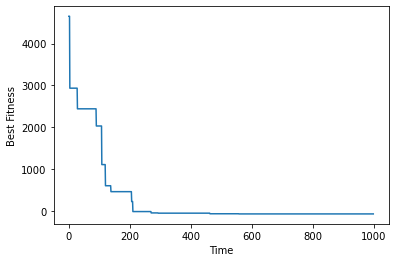

Genotype:  [ 0. 14.  7. 13.  6. 10.  9.  4. 11.  5.]
Fitness:  -76.9450287679465
Ratings Difference:  7.054971232053504


In [9]:
roster = Roster.oRoster("c")
sample = []
while len(sample) < 15:
    new = np.random.choice(list(roster.keys()))
    if new not in sample:
        sample.append(new)
        
def fit(genotype):
    Atotal = 0
    Btotal = 0
    
    Ahappiness = 0
    Bhappiness = 0
    
    totalHappiness = 0
    
    for i in range(10):
        index = roster[sample[int(genotype[i])]][1].index(i % 5)
        if i < 5:
            Atotal += roster[sample[int(genotype[i])]][0]
            Ahappiness += 5 - index
        else:
            Btotal += roster[sample[int(genotype[i])]][0]
            Bhappiness += 5 - index
        
        if index >= 3:
            totalHappiness -= 1000
        else:
            totalHappiness += 5 - roster[sample[int(genotype[i])]][1].index(i % 5)
    
    happinessDifferenceWeighted = abs(Ahappiness - Bhappiness) * 2
    weightedTotalHappiness = totalHappiness *2
    totalDifference = abs(Atotal - Btotal)
    
    weightedOutput = totalDifference + happinessDifferenceWeighted - weightedTotalHappiness
    
    return weightedOutput

def ratingFit(genotype):
    Atotal = 0
    Btotal = 0
    for i in range(10):
        if i < 5:
            Atotal += roster[sample[int(genotype[i])]][0]
        else:
            Btotal += roster[sample[int(genotype[i])]][0]
    totalDifference = abs(Atotal - Btotal)
    return totalDifference

pop = 40
mprob = 0.1
rprob = 0.5
geneSize = 10
sampleSize = len(sample)
fitness = fit
duration = 1000



best = np.zeros(duration)
balance = Evolutionary(pop, mprob, rprob, geneSize, fitness, sampleSize)

for i in range(duration):
    balance.step()
    best[i] = balance.best()

plt.plot(best)
plt.xlabel("Time")
plt.ylabel("Best Fitness")
plt.show()

best, genotype = balance.getBest()
first = []
second = []
for i in range(geneSize):
    if i < 5:
        first.append(sample[int(genotype[i])])
    else:
        second.append(sample[int(genotype[i])])
print("Genotype: ", genotype)
print("Fitness: ", best)
print("Ratings Difference: ",ratingFit(genotype))    